# Small-worldness, scale freedom, and modularity analyses

Set up environment.

In [1]:
import networkx as nx
import networkx.algorithms.community as nx_comm
from tqdm import tqdm
import statistics as st
import pandas as pd
from math import log # is yet the natural logarithm ln
import seaborn as sns

Build an undirected network for papers and one for journals

In [2]:
papers_network = nx.read_gml("../gml format networks/undirected_papers_network.gml")
journals_network = nx.read_gml("../gml format networks/undirected_journals_network.gml")

## Small-world effect 

A small-world network is a graph in which we expect to find shorther-than-expencted distances between pairs of nodes. In particular, in a small-world network most nodes are not neighbors of one another, but the neighbors of any given node are likely to be neighbors of each other and most nodes can be reached from every other node by a small number of hops or steps.

From a mathematical point of view, the mean distance $\ell_i$ for a node $i$ corresponds to $\ell_i=\frac{\sum_j d_{ij}}{n}$. Where $d_{ij}$ is the length of the shortest path between the nodes $i$ and $j$.

Therefore, the mean distance for the whole network corresponds to:

$$ \ell = \frac{\sum_{ij} d_{ij}}{n^2}$$

A small-world network is thus defined as a network where the distance $\ell$ between two random nodes grows proportionally to the logarithm of the number of nodes $n$ in the network:

$$ \ell \propto log n$$

#### Sigma and Omega coefficients

There are two main ways to qunatify the small-worldness of a network:
- Computing the small-world measure $\sigma$ by comparing clustering and path length of a given network to an equivalent random network with same degree on average.
- Computing the small-world measure $\omega$ by comparing the clustering of a given network to an equivalent lattice network and its path length to an equivalent random network.

$\sigma$ is defined as:

$$\sigma= \dfrac{\dfrac{C}{C_r}}{\dfrac{L}{L_r}}$$

Where $C$ is the clustering coefficient of our network and $C_r$ is the clusetering coefficient of an equivalent random graph, while $L$ and $L_r$ are the average shortest path values for our network and an equivalent random graph, respectively.

A graph is commonly classified as small-world if $\sigma \gt 1$ $(C ≫ C_r$ $and$ $L ≈ L_r)$.

$\omega$ is defined as:

$$\omega=\dfrac{L_r}{L}-\dfrac{C}{C_l}$$

Where $C$ and $L$ are respectively the average clustering coefficient and average shortest path length of our network, while $L_r$ is the average shortest path length of an equivalent random graph and $C_l$ is the average clustering coefficient of an equivalent lattice graph.

Negative values of $\omega$ mean that our network is similar to a lattice, whereas positive values mean that it is more likely to be similar to a random graph. Values close to 0 mean that it has small-world characteristics.

### Computing the small-wordness coefficient $\sigma$

The dimensions of the networks we are dealing with do not allow us to use NetworkX to measure the coefficients. Therefore, we will compute them step by step.
As we have seen before, to compute $\sigma$ we need the clustering coefficient and the average path length of both our graphs and the correspondent random graphs.


#### Papers network

##### Computing the clustering coefficient $C$ and the average path length $L$ of our network.

In [ ]:
# Compute C
C = nx.average_clustering(papers_network)
print("C = ", C)

In [ ]:
# Compute L
L_list = list() # list of L values
for N in (papers_network.subgraph(n).copy() for n in nx.connected_components(papers_network)): # for each connected component of the network (N) 
    L_list.append(nx.average_shortest_path_length(N)) # compute L and append it to the list

if len(L_list) > 1:
    computable_L_list = [L for L in L_list if L != 1.0] # remove the 0 values
    if len(computable_L_list) == 1:
        L = computable_L_list[0]
    else:
        L = st.mean(computable_L_list)
else:
    L = L_list[0]

print("L = ", L)

##### Retrieve the number of edges $E$ and nodes $n$ in the network and the probability $p$ of finding an edge between two random nodes in the graph.

In [ ]:
E = papers_network.nx.number_of_edges()
n = papers_network.nx.number_of_nodes()
p = (2*E)/((n-1)*n)

print("E = ", E)
print("n = ", n)
print("p = ", p)

##### Creating the random graphs

We have decided to compute the sigma value with respect to 2 different sets of random graphs. The first set is made of random graphs built thanks to the Erdős–Rényi model, by using the number of nodes and the probability we found before. The second is composed by random graphs built by using the number of nodes and edges as parameters.

    a. ER graphs with nodes and probability

Now, we compute ten <i>ER random graphs</i> using the number of nodes and the probability value just obtained. Thus, we compute the average clustering coefficient and the average shortest path of the set of networks.

In [ ]:
i = 0
er_clusters_list = list()
er_shortest_list = list()
for network in tqdm(range(0, 11)):
    G = nx.erdos_renyi_graph(n,p)
    er_clusters_list.append(nx.average_clustering(G))
    er_shortest_list.append(nx.average_shortest_path_length(G))
    i+=1

er_L_r = st.mean(er_shortest_list) # average shortest path length of the random network
er_C_r = st.mean(er_clusters_list) # average clustering coefficient of the random network

print("Average shortest path length: ", er_L_r, "standard deviation: ", st.stdev(er_shortest_list))
print("Average clustering coefficient: ", er_C_r, "standard deviation: ", st.stdev(er_clusters_list))

    b. Random graphs with nodes and edges

Now, we compute ten <i>random graphs</i> passing as parameters the number of nodes and edges of our real graph. Thus, we compute the average clustering coefficient and the average shortest path of the set of networks.

In [ ]:
i=0
er_clusters_list = list()
er_shortest_list = list()
for iteration in tqdm(range(0, 11)):
    G = nx.gnm_random_graph(n,E)
    er_clusters_list.append(nx.average_clustering(G))
    er_shortest_list.append(nx.average_shortest_path_length(G))
    i+=1

rand_L_r = st.mean(er_shortest_list) # average shortest path length of the random network
rand_C_r = st.mean(er_clusters_list) # average clustering coefficient of the random network

print("Average shortest path length: ", rand_L_r, "standard deviation: ", st.stdev(er_shortest_list))
print("Average clustering coefficient: ", rand_C_r, "standard deviation: ", st.stdev(er_clusters_list))

100%|██████████| 11/11 [05:36<00:00, 30.57s/it]


##### Computing the Sigma value

    a. With respect to the ER graphs

In [ ]:
N = C/er_C_r # clustering coefficient
D = L/er_L_r # shortest path length

er_sigma_value = N/D

print(N, D, er_sigma_value)

    b. With respect to the random graphs

In [ ]:
N = C/rand_C_r
D = L/rand_L_r

rand_sigma_value = N/D
print(N, D, rand_sigma_value)

#### Journals network

##### Computing the clustering coefficient $C$ and the average path length $L$ of our network.

In [5]:
# Compute C
C = nx.average_clustering(journals_network)
print("C = ", C)

C =  0.33300640976926094


In [15]:
L_list = list() # list of L values
for N in (journals_network.subgraph(n).copy() for n in nx.connected_components(journals_network)): # for each connected component of the network (N) 
    L_list.append(nx.average_shortest_path_length(N)) # compute L and append it to the list

if len(L_list) > 1:
    computable_L_list = [L for L in L_list if L != 1.0] # remove the 0 values
    if len(computable_L_list) == 1:
        L = computable_L_list[0]
    else:
        L = st.mean(computable_L_list)
else:
    L = L_list[0]

print("L = ", L)

[2.989171113335879]
L =  2.989171113335879
L =  2.989171113335879


##### Retrieve the number of edges $E$ and nodes $n$ in the network and the probability $p$ of finding an edge between two random nodes in the graph.

In [6]:
E = journals_network.number_of_edges()
n = journals_network.number_of_nodes()
p = (E)/(((n-1)*n)/2)


print("E = ", E)
print("n = ", n)
print("p = ", p)

E =  39100
n =  5661


##### Creating the random graphs

As it has been done before, we compute the sigma value with respect to 2 different sets of random graphs. The first set is made of random graphs built thanks to the Erdős–Rényi model, by using the number of nodes and the probability we found before. The second is composed by random graphs built by using the number of nodes and edges as parameters.

    a. ER graphs with nodes and probability

Now, we compute ten <i>ER random graphs</i> using the number of nodes and the probability value just obtained. Thus, we compute the average clustering coefficient and the average shortest path of the set of networks.

In [8]:
i=0
er_clusters_list = list()
er_shortest_list = list()
for iteration in tqdm(range(0, 11)):
    G = nx.erdos_renyi_graph(n,p)
    er_clusters_list.append(nx.average_clustering(G))
    er_shortest_list.append(nx.average_shortest_path_length(G))
    i+=1

er_L_r = st.mean(er_shortest_list)
er_C_r = st.mean(er_clusters_list)

print("Average shortest path length: ", er_L_r, "standard deviation: ", st.stdev(er_shortest_list))
print("Average clustering coefficient: ", er_C_r, "standard deviation: ", st.stdev(er_clusters_list))

100%|██████████| 11/11 [16:19<00:00, 89.04s/it]


    b. Random graphs with nodes and edges

In [ ]:
i=0
er_clusters_list = list()
er_shortest_list = list()
for iteration in tqdm(range(0, 11)):
    G = nx.gnm_random_graph(n,E)
    er_clusters_list.append(nx.average_clustering(G))
    er_shortest_list.append(nx.average_shortest_path_length(G))
    i+=1

rand_L_r = st.mean(er_shortest_list)
rand_C_r = st.mean(er_clusters_list)

print("Average shortest path length: ", rand_L_r, "standard deviation: ", st.stdev(er_shortest_list))
print("Average clustering coefficient: ", rand_C_r, "standard deviation: ", st.stdev(er_clusters_list))

##### Computing the Sigma values

    a. With respect to the ER graphs

In [10]:
N = C/er_C_r
D = L/er_L_r
er_sigma_value = N/D

print(N, D, er_sigma_value)

132.05345952052573 0.8328601256409661 158.5541862973664


    b. With respect to the random graphs

In [ ]:
N = C/rand_C_r
D = L/rand_L_r
rand_sigma_value = N/D

print(N, D, rand_sigma_value)

139.7518096219451 0.8332504458567752 167.71885369739917


<span style="color:red">In the end, the sigma value remains pretty similar for both the ways of computing ER random graphs.</span>

------------

Compute omega values.
</br>
$$\omega=\dfrac{L_r}{L}-\dfrac{C}{C_l}$$


Where $L_r$ is computed from a random graph and, $C_l$ is computed from a lattice graph.
</br>
$\omega$ should be between 0 and 1.

#### B)

Seen that $L_r$, $L$ and $C$ have yet been computed, we just need to define $C_L$ for lattice graph.

In [ ]:
latticized_jn = nx.lattice_reference(journals_network)

Extract $C_l$.

In [ ]:
C_l = nx.average_clustering(latticized_jn)

## Scale freedom 

A scale free network is a network whose nodes' degree follow a power law distribution (since it is dependent on a power). It is said to be scale free since one attribute of power laws is their scale invariance. In fact, given a relation Given a relation $f(x)=ax^{−k}$, scaling the argument $x$ by a constant factor $c$ causes only a proportionate scaling of the function itself.

A power law distribution is descrbed by the following formula:
$$p_d=Cd^{-\alpha}$$

Where $\alpha$ and $C$  are the two contants modifying the slope and normalize the curve of the diatribution, while $d$ is the degree and $p_d$ is the fraction of nodes with degree $d$.

### Plotting the degree distribution 

To detect whether or not the distribution we are dealing with is a power law distribution, we first plot it in a normal and in a log-log scale to understand if it presents a identifiable long tale and a line behaviour respectively.

#### Journals network

In [59]:
jn_degree_distribution_list = []
for node in journals_network: 
    jn_degree_distribution_list.append(journals_network.degree(node)) # compute the degree of each node and append it to the list of degrees

jn_dist_df = pd.DataFrame()
jn_dist_df['degree'] = jn_degree_distribution_list # create a dataframe with the list of degrees as a column
jn_dist_df

,degree
0,64
1,617
2,60
3,249
4,90
...,...
5656,1
5657,1
5658,1
5659,1


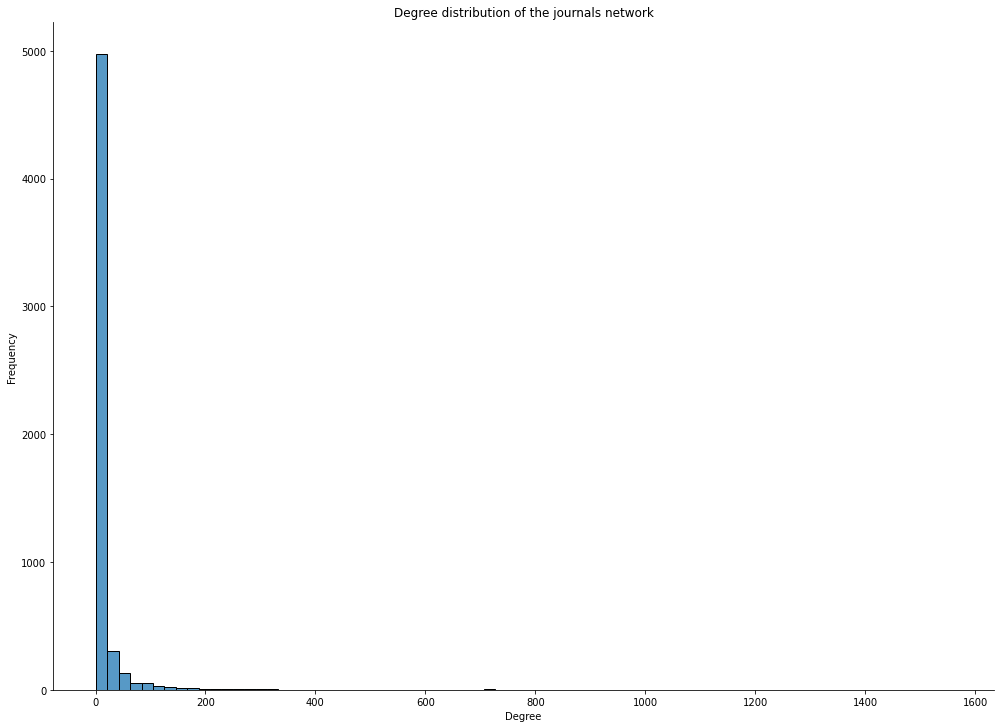

In [64]:
jn_dist_viz = sns.displot(jn_dist_df['degree'], height=10, aspect=7/5, bins=75)
jn_dist_viz.set(xlabel='Degree', ylabel='Frequency', title='Degree distribution of the journals network')
jn_dist_viz

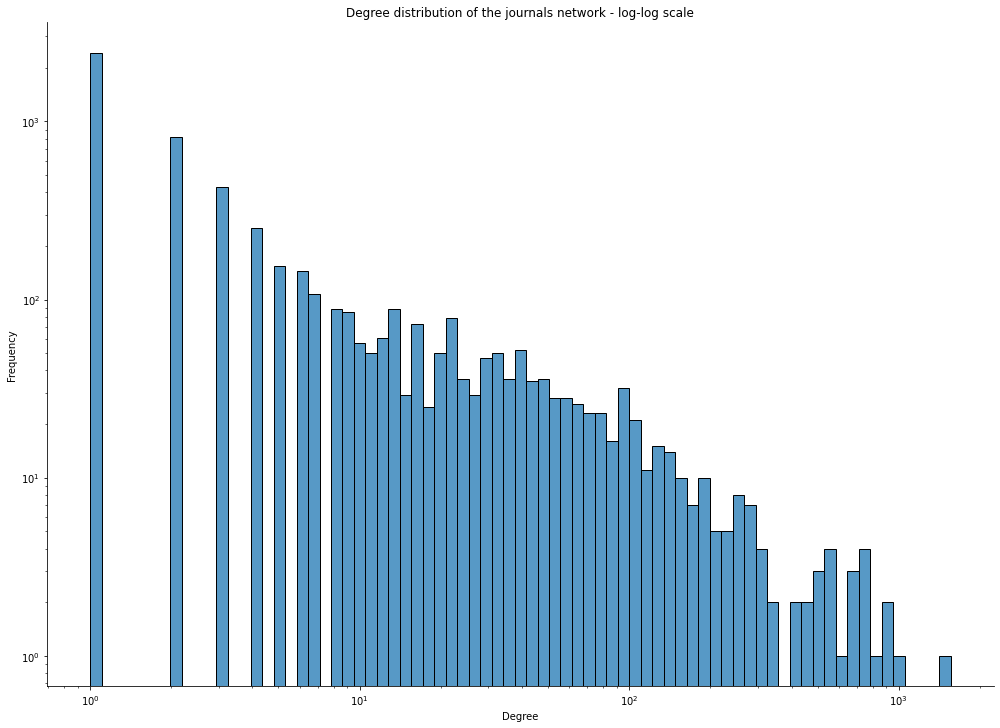

In [65]:
jn_dist_viz = sns.displot(jn_dist_df['degree'], height=10, aspect=7/5, bins=75, log_scale=(True, True))
jn_dist_viz.set(xlabel='Degree', ylabel='Frequency', title='Degree distribution of the journals network - log-log scale')
jn_dist_viz

#### Papers network

In [63]:
pn_degree_distribution_list = []
for node in papers_network: 
    pn_degree_distribution_list.append(papers_network.degree(node)) # compute the degree of each node and append it to the list of degrees

pn_dist_df = pd.DataFrame()
pn_dist_df['degree'] = pn_degree_distribution_list # create a dataframe with the list of degrees as a column
pn_dist_df

,degree
0,54
1,13
2,61
3,7
4,8
...,...
49714,1
49715,1
49716,1
49717,1


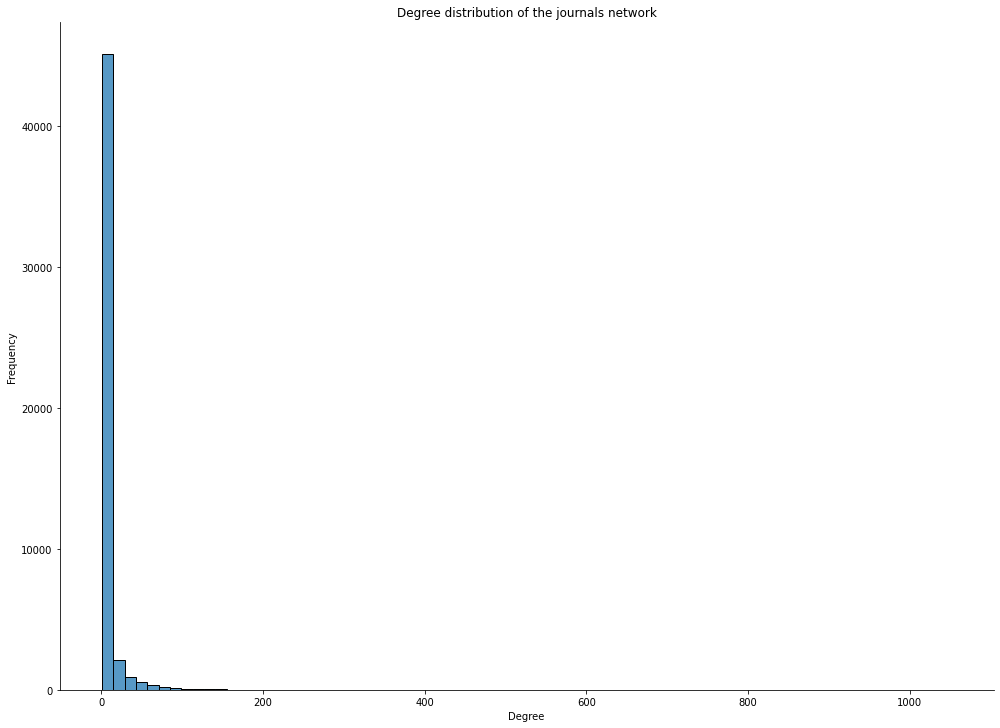

In [66]:
pn_dist_viz = sns.displot(pn_dist_df['degree'], height=10, aspect=7/5, bins=75)
pn_dist_viz.set(xlabel='Degree', ylabel='Frequency', title='Degree distribution of the journals network')
pn_dist_viz

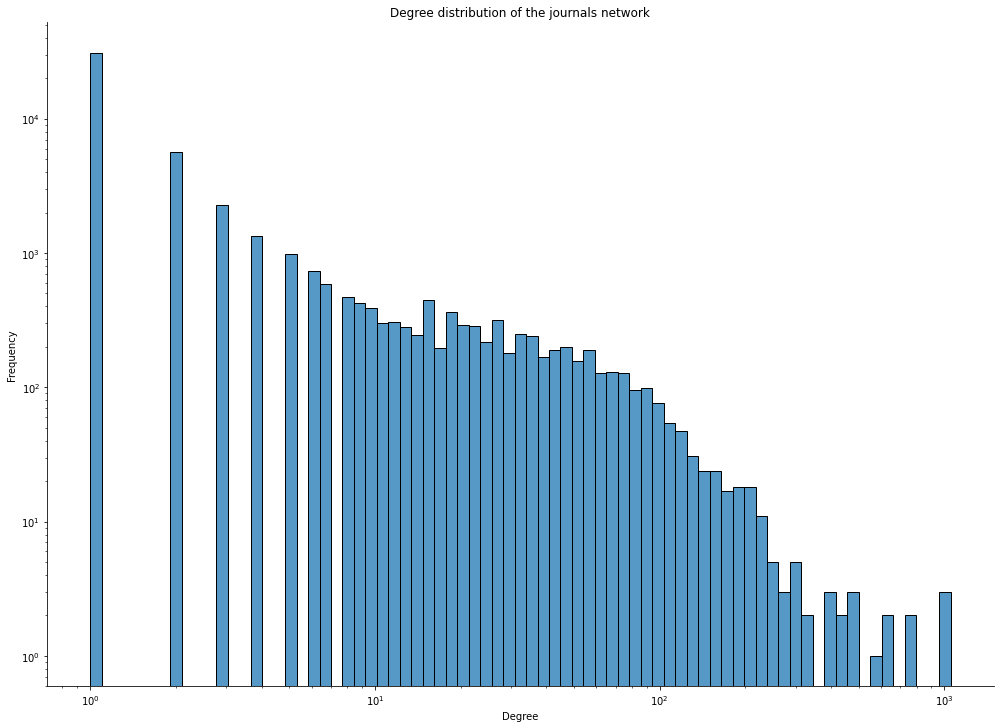

In [67]:
pn_dist_viz = sns.displot(pn_dist_df['degree'], height=10, aspect=7/5, bins=75, log_scale=(True, True))
pn_dist_viz.set(xlabel='Degree', ylabel='Frequency', title='Degree distribution of the journals network')
pn_dist_viz

### Computing the scaling coefficient
To be sure that our conclusions are not based on biased visual interpretations, we measure how close our distribution is to a power law distribution by compute the scaling coefficient $\alpha$ as follows:

$$\alpha=1+n(\sum_i ln \frac{d_i}{d_{min}-1/2})^{-1}$$

Where:
- $n$ is the number of nodes in our network.
- $d_i$ is the degree of the node $i$.
- $d_{min}$ is the minimum degree found in our graph.

Finding an $\alpha$ value such that $2 \le \alpha \le 3$ means that our network is a scale free newtork.

#### Journals network

In [57]:
sum_val = 0

for degree in jn_degree_distribution_list:
    sum_val += log(degree/(1-1/2)) # compute the sum of the log of the degrees divided by the minimum degree in our netwrork (1) - 1/2


jn_alpha_sc = 1+len(jn_degree_distribution_list)*(sum_val)**-1 #compute alpha
print("alpha = ", jn_alpha_sc)

alpha =  1.5434686393381751


We can conclude that the nodes' degree of our network do not follow a power law distribution, therefore our network cannot be said to be scale-free.

#### Papers network

In [68]:
sum_val = 0

for degree in pn_degree_distribution_list:
    sum_val += log(degree/(1-1/2)) # compute the sum of the log of the degrees divided by the minimum degree in our netwrork (1) - 1/2


pn_alpha_sc = 1+len(pn_degree_distribution_list)*(sum_val)**-1 #compute alpha
print("alpha = ", pn_alpha_sc)

alpha =  1.7225756547006679


We can conclude that the nodes' degree of our network do not follow a power law distribution, therefore our network cannot be said to be scale-free.

## Modularity

Modularity measures the strength of division of a network into modules. In particular, the extent to which similar nodes are likely to connect to each other.

Basically, it is the fraction of the edges falling within the given groups minus the expected fraction if edges were distributed at random.

Modularity's value for an unweighted undirected graph lies in the range ${\displaystyle [-1/2,1]}$. It is positive if the number of edges within groups exceeds the number expected on the basis of chance. High modularity is symptome of dense connections between the nodes within modules but sparse connections between nodes in different modules.

To understand the modularity of a network, we have to find the value of $Q$, that is the modularity coefficient and is computed as:

$$Q=\frac{1}{2m}\sum_{ij}(A_{ij}-\frac{d_id_j}{2m})\delta_{g_ig_j}$$

Where:
- $m$ is the number of edges.
- $A$ is the adjacency matrix of the network.
- $d_i$ and $d_j$ are the degrees of the nodes $i$ and $j$.
- $\delta_{g_ig_j}$ is 1 if $i$ and $j$ are in the same community, else 0.

To compute modularity we directly use networkX. In particular, our network is passed as input to the `modularity()` method as well as the result of the application of the **label propagation communities** algorithm to (again) our network. This algorithm is able to detect communities in the input undirected graph.

#### Journals network

In [87]:
jn_modularity = nx_comm.modularity(journals_network, nx_comm.label_propagation_communities(journals_network)) 
print("Modularity of the journals network: ", jn_modularity)

Modularity of the journals network:  0.0066511633231074495


#### Papers network

In [88]:
pn_modularity = nx_comm.modularity(papers_network, nx_comm.label_propagation_communities(papers_network))
print("Modularity of the papers network: ", pn_modularity)

Modularity of the papers network:  0.36200907667603377
